 Water Logging Classification

Name: Idhika Vaidya

### Data Collection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
data = pd.read_csv('/content/Targ2.csv')

In [ ]:
data.head()

,Aspect,Drainage_D,Amalner_El,Flow_Accum,Flow_Direc,Plan_,Profile_,Slope_Amal,SLF,Stream_Pow,...,Land_Cover,Geo_,Critical_I,Road_Buffe,Feature_La,Distance_F,Population,X,Y,Target
0,0.192076,458.803009,125,0,32,0.00,0.00,1.52712,0.000000,0.000000,...,3,6,0.0,1,3,2943.090088,5800.172001,21.042099,75.054680,1
1,269.963989,456.946014,125,0,16,0.00,-0.64,2.29015,0.000000,0.399912,...,2,6,0.0,1,3,2902.590088,5800.172001,21.042003,75.054621,1
2,314.990997,475.079010,125,0,64,-0.80,0.48,2.15591,0.000000,1.505790,...,3,6,0.0,1,3,2983.770020,2717.833314,21.041448,75.054533,1
3,251.617996,496.488007,125,2,16,-0.64,0.64,2.41153,0.392944,0.842266,...,3,6,0.0,1,3,2480.120117,2717.833314,21.041053,75.054482,1
4,314.990997,475.079010,125,4,64,-0.80,0.48,2.15591,0.448245,1.505790,...,3,6,0.0,1,3,2965.280029,2717.833314,21.041447,75.054477,1


### Data Preprocessing

**A. Move the columns with X and Y coordinates to another dataset called "co_ord"**

In [ ]:
# Move the columns 'X' and 'Y' to the new DataFrame 'co_ord'
co_ord = data[['X', 'Y']]

co_ord.head()

,X,Y
0,21.042099,75.054680
1,21.042003,75.054621
2,21.041448,75.054533
3,21.041053,75.054482
4,21.041447,75.054477


**B. Assign the remaining data to a dataset called "clean_tar"**

In [ ]:
# Assigning the remaining columns from df to 'clean_tar'
clean_tar = data.drop(columns=['X', 'Y'])

clean_tar.head()

,Aspect,Drainage_D,Amalner_El,Flow_Accum,Flow_Direc,Plan_,Profile_,Slope_Amal,SLF,Stream_Pow,...,SAVi,AWEI,Land_Cover,Geo_,Critical_I,Road_Buffe,Feature_La,Distance_F,Population,Target
0,0.192076,458.803009,125,0,32,0.00,0.00,1.52712,0.000000,0.000000,...,0.075905,-0.000088,3,6,0.0,1,3,2943.090088,5800.172001,1
1,269.963989,456.946014,125,0,16,0.00,-0.64,2.29015,0.000000,0.399912,...,0.095073,-0.000102,2,6,0.0,1,3,2902.590088,5800.172001,1
2,314.990997,475.079010,125,0,64,-0.80,0.48,2.15591,0.000000,1.505790,...,0.114398,-0.000070,3,6,0.0,1,3,2983.770020,2717.833314,1
3,251.617996,496.488007,125,2,16,-0.64,0.64,2.41153,0.392944,0.842266,...,0.130359,-0.000082,3,6,0.0,1,3,2480.120117,2717.833314,1
4,314.990997,475.079010,125,4,64,-0.80,0.48,2.15591,0.448245,1.505790,...,0.114398,-0.000070,3,6,0.0,1,3,2965.280029,2717.833314,1


In [ ]:
df=clean_tar.copy()

In [ ]:
df.isnull().sum()

,0
Aspect,0
Drainage_D,0
Amalner_El,0
Flow_Accum,0
Flow_Direc,0
Plan_,0
Profile_,0
Slope_Amal,0
SLF,0
Stream_Pow,0


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aspect      1350 non-null   float64
 1   Drainage_D  1350 non-null   float64
 2   Amalner_El  1350 non-null   int64  
 3   Flow_Accum  1350 non-null   int64  
 4   Flow_Direc  1350 non-null   int64  
 5   Plan_       1350 non-null   float64
 6   Profile_    1350 non-null   float64
 7   Slope_Amal  1350 non-null   float64
 8   SLF         1350 non-null   float64
 9   Stream_Pow  1350 non-null   float64
 10  TRI         1350 non-null   float64
 11  TPI         1350 non-null   float64
 12  TWI         1350 non-null   float64
 13  HSG         1350 non-null   int64  
 14  SM          1350 non-null   float64
 15  ndmi        1350 non-null   float64
 16  Soil_Textu  1350 non-null   int64  
 17  pres_seaso  1350 non-null   float64
 18  IBI         1350 non-null   float64
 19  Building_D  1350 non-null  

In [ ]:
df.shape

(1350, 31)

In [ ]:
df.describe()

,Aspect,Drainage_D,Amalner_El,Flow_Accum,Flow_Direc,Plan_,Profile_,Slope_Amal,SLF,Stream_Pow,...,SAVi,AWEI,Land_Cover,Geo_,Critical_I,Road_Buffe,Feature_La,Distance_F,Population,Target
count,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,141.794141,232.576486,123.887407,1.394890e+05,37.549630,-0.010136,0.051019,1.441585,1.880813,3.544214e+04,...,0.147089,-0.000088,2.675556,5.480741,22486.876301,0.825185,9.083704,2254.552275,6505.550795,0.935556
std,116.959301,189.161168,3.751835,1.010515e+06,39.627736,0.320027,0.429831,1.437872,14.588645,3.187624e+05,...,0.081038,0.000028,0.698348,1.467463,85056.091136,0.379949,12.226596,1135.191809,6066.327371,0.245634
min,-1.000000,0.000000,111.000000,0.000000e+00,1.000000,-1.280000,-0.960000,0.000115,0.000000,0.000000e+00,...,-0.036098,-0.000142,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1988.634802,0.000000
25%,33.568449,78.576876,122.000000,0.000000e+00,4.000000,0.000000,0.000000,0.006703,0.000000,0.000000e+00,...,0.093929,-0.000102,2.000000,6.000000,0.000000,1.000000,3.000000,1569.060059,2717.833314,1.000000
50%,108.523003,210.238007,125.000000,3.000000e+00,16.000000,0.000000,0.000000,1.087215,0.000574,3.165310e-02,...,0.135318,-0.000095,3.000000,6.000000,0.000000,1.000000,3.000000,2595.899902,5236.131894,1.000000
75%,258.104004,327.299492,126.000000,1.200000e+01,64.000000,0.000000,0.480000,2.294550,0.430118,1.510830e+00,...,0.189862,-0.000086,3.000000,6.000000,0.000000,1.000000,3.000000,3083.457519,8147.255616,1.000000
max,359.976013,1176.180054,146.000000,7.609250e+06,128.000000,1.280000,1.280000,12.956900,264.320007,5.350820e+06,...,0.473572,0.000010,4.000000,6.000000,575767.000000,1.000000,44.000000,4872.379883,48101.819460,1.000000


In [ ]:
#Relational Analysis

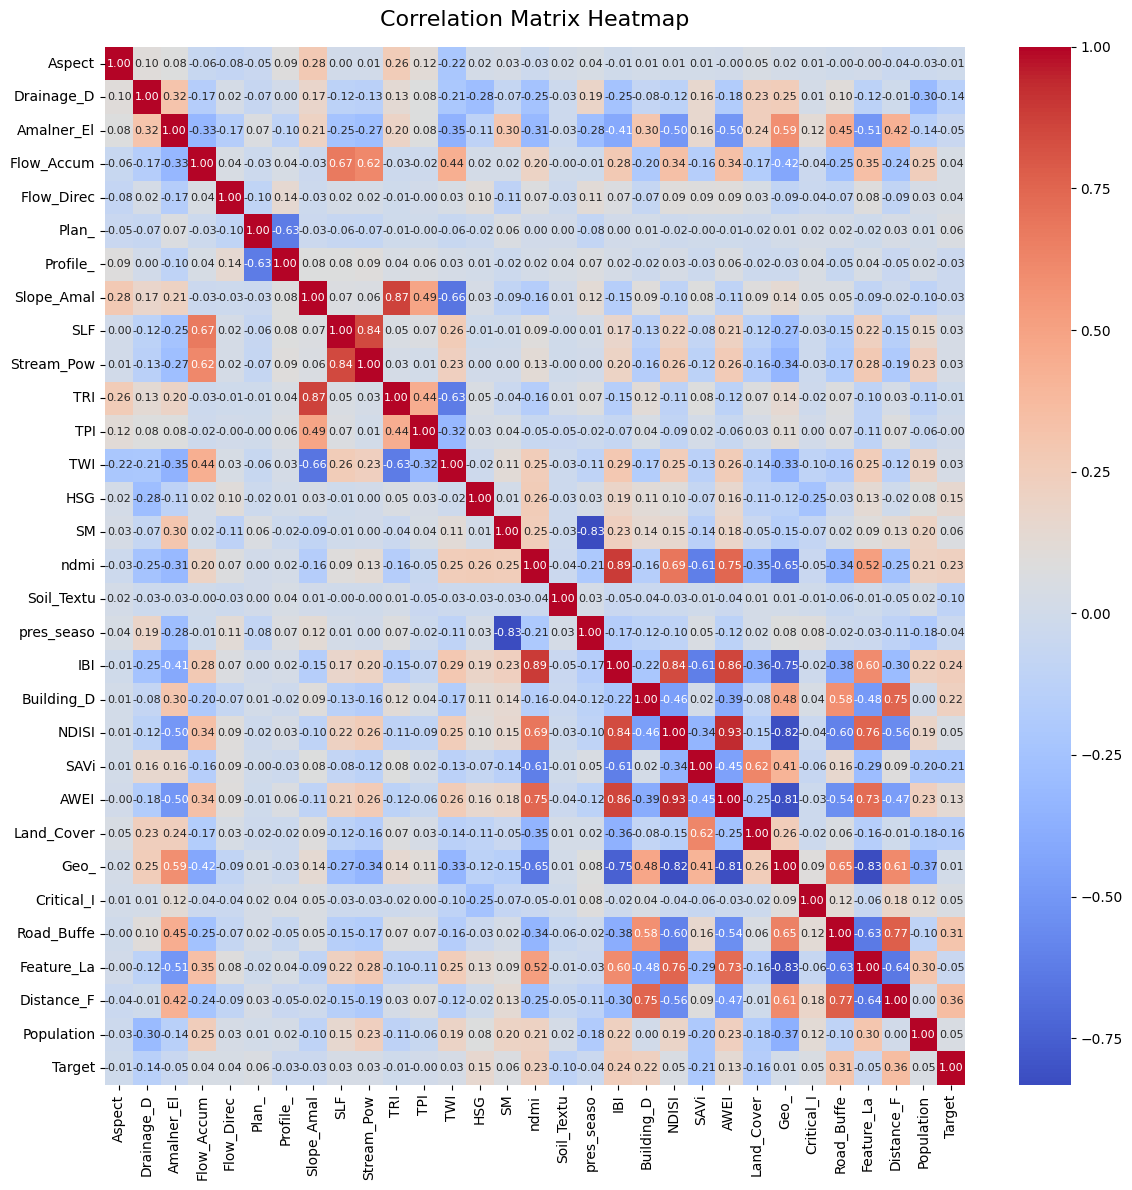

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the heatmap visualization
plt.figure(figsize=(12, 12))  # Set the figure size
sns.heatmap(
    data=correlation_matrix,  # Pass the correlation matrix
    annot=True,               # Display the correlation coefficients
    fmt=".2f",                # Format numbers to 2 decimal places
    cmap="coolwarm",          # Use the "coolwarm" colormap
    cbar=True,                 # Include the color bar
    annot_kws={"size": 8}
)

# Add a title and display the plot
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=15)  # Add title with styling
plt.tight_layout()  # Adjust layout for better display
plt.show()


In [ ]:
df2=df.copy()

In [ ]:
#For PowerBI dashboard to get test data

train_tar, test_tar = train_test_split(df2, test_size=0.3, random_state=42)

test_tar.head()

,Aspect,Drainage_D,Amalner_El,Flow_Accum,Flow_Direc,Plan_,Profile_,Slope_Amal,SLF,Stream_Pow,...,SAVi,AWEI,Land_Cover,Geo_,Critical_I,Road_Buffe,Feature_La,Distance_F,Population,Target
289,-1.000000,417.731995,122,2,16,0.0,0.00,0.005243,0.000136,0.001830,...,0.093729,-0.000109,2,6,0.0,1,3,3171.270020,5800.172001,1
1036,-1.000000,320.000000,131,2,2,0.0,0.00,0.004193,0.000102,0.001464,...,0.039341,-0.000094,2,6,0.0,1,3,3878.810059,26750.575950,0
535,256.003998,219.317001,125,16,16,0.0,0.00,0.004171,0.000232,0.011648,...,0.077073,-0.000090,2,6,0.0,1,3,2636.649902,2717.833314,1
346,314.608002,576.281006,124,3,128,0.0,0.00,1.076640,0.429046,12.967100,...,0.332677,-0.000088,4,6,0.0,0,3,813.219971,2521.432156,1
1075,236.289993,70.710701,123,1,8,0.0,0.64,2.750340,0.353258,0.480387,...,0.109807,-0.000089,3,6,0.0,0,31,0.000000,5459.157030,1


In [ ]:
test_tar.to_excel('test_tar.xlsx', index=False)

In [ ]:
train_tar.to_excel('train_tar.xlsx', index=False)

In [ ]:
clean_tar.to_excel('clean_tar.xlsx', index=False)

In [ ]:
co_ord.to_excel('co_ord.xlsx', index=False)

### Data Preparation

Feature Scaling

In [ ]:
scaler = StandardScaler()

# Select the columns to scale (all columns except 'Target' for this example)
columns_to_scale = df.columns[df.columns != 'Target']

# Fit and transform the data and assign it back to the DataFrame
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now, 'df' will have the scaled values, with 'Target' unchanged

In [ ]:
#Feature Selection

Feature Selection

In [ ]:
# X contains the features and y is the target
X = df.drop("Target", axis=1)
y = df["Target"]

# Initialize and fit the Extra Trees Classifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Print the feature importance
display(feature_importance_df)

,Feature,Importance
28,Distance_F,0.105435
19,Building_D,0.079970
26,Road_Buffe,0.075288
18,IBI,0.066749
15,ndmi,0.055867
27,Feature_La,0.049993
22,AWEI,0.044251
20,NDISI,0.043160
2,Amalner_El,0.040356
24,Geo_,0.037002


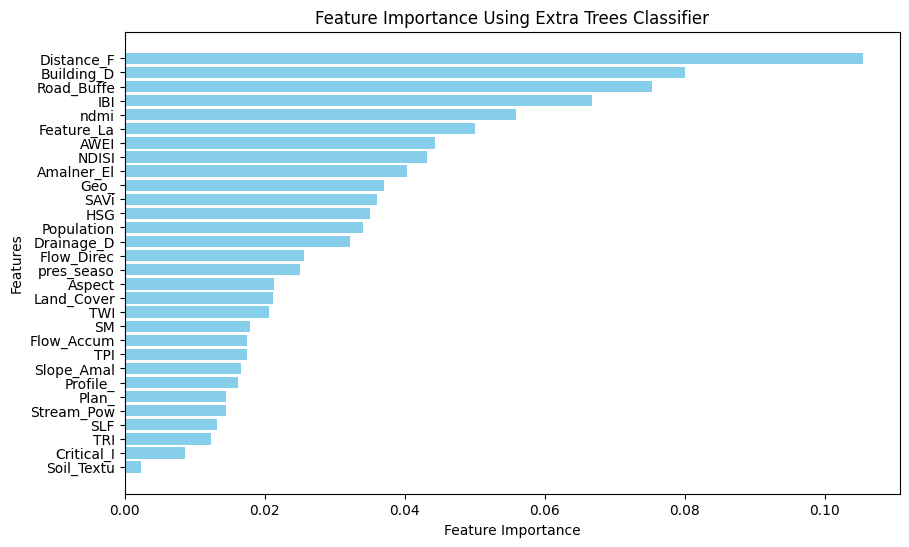

In [ ]:
#Plot feature importances

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Using Extra Trees Classifier")
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


In [ ]:
#To drop less important features

# Filter features with importance greater than 0.025
selected_features = feature_importance_df[feature_importance_df["Importance"] > 0.025]

# Print the selected features
print("Selected features based on importance greater than 0.025:")
display(selected_features)


Selected features based on importance greater than 0.025:


,Feature,Importance
28,Distance_F,0.105435
19,Building_D,0.079970
26,Road_Buffe,0.075288
18,IBI,0.066749
15,ndmi,0.055867
27,Feature_La,0.049993
22,AWEI,0.044251
20,NDISI,0.043160
2,Amalner_El,0.040356
24,Geo_,0.037002


In [ ]:
# Get the names of the selected features
selected_feature_names = selected_features["Feature"].tolist()

# Add the target column to retain it in the filtered DataFrame
selected_feature_names.append("Target")  # Replace "Target" with the name of your target column

# Filter the original DataFrame to keep only the selected features
df = df[selected_feature_names]

# Verify the updated DataFrame
print("Updated DataFrame with selected features:")
display(df.head())

Updated DataFrame with selected features:


,Distance_F,Building_D,Road_Buffe,IBI,ndmi,Feature_La,AWEI,NDISI,Amalner_El,Geo_,SAVi,HSG,Population,Drainage_D,Flow_Direc,Target
0,0.606764,0.137562,0.460271,0.195918,-0.019065,-0.497764,0.007284,-0.452671,0.296656,0.35398,-0.878726,-0.975124,-0.116321,1.196389,-0.140096,1
1,0.571074,0.137562,0.460271,0.195918,-0.059850,-0.497764,-0.513884,-0.452671,0.296656,0.35398,-0.642105,-0.975124,-0.116321,1.186568,-0.544003,1
2,0.642612,0.065263,0.460271,0.416003,-0.255794,-0.497764,0.626197,0.203801,0.296656,0.35398,-0.403546,-0.975124,-0.624615,1.282464,0.667719,1
3,0.198778,-0.222152,0.460271,0.056325,-0.203070,-0.497764,0.197678,0.812030,0.296656,0.35398,-0.206519,-0.975124,-0.624615,1.395685,-0.544003,1
4,0.626318,-0.099313,0.460271,0.029505,-0.255794,-0.497764,0.626197,-0.004806,0.296656,0.35398,-0.403546,-0.975124,-0.624615,1.282464,0.667719,1


D. Using loading from the machine learning, find the top six variable.

In [ ]:
# 'Importance' is the column with feature importance values
top_6_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(6)
print(top_6_features)

       Feature  Importance
28  Distance_F    0.105435
19  Building_D    0.079970
26  Road_Buffe    0.075288
18         IBI    0.066749
15        ndmi    0.055867
27  Feature_La    0.049993


In [ ]:
#These features will be used as slicers in the powerbi dashboard

### Model Building

C. Split the remaining data in two parts.  70 per cent of the rows should be part of the  training data set called "train_tar" and 30 per cent of the data should be saved in test_tar.


In [ ]:
# Split the dataset into train and test sets
train_tar1, test_tar1 = train_test_split(df, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training dataset shape: {train_tar1.shape}")
print(f"Testing dataset shape: {test_tar1.shape}")

Training dataset shape: (945, 16)
Testing dataset shape: (405, 16)


In [ ]:
# Separate features (X) and target (y) in the training and testing datasets
X_train = train_tar1.drop(columns=['Target'])
y_train = train_tar1['Target']
X_test = test_tar1.drop(columns=['Target'])
y_test = test_tar1['Target']

In [ ]:
#Check for class imbalance

Class Distribution:
Target
1    1263
0      87
Name: count, dtype: int64

Class Percentages:
Target
1    93.555556
0     6.444444
Name: count, dtype: float64


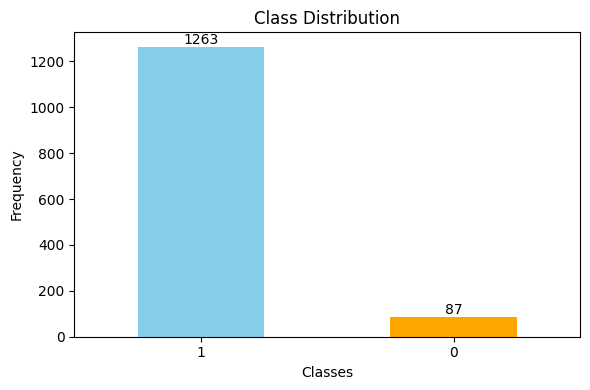

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Target' is the column name for the target variable in the dataset
class_counts = df['Target'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_counts)

# Calculate and display the percentage of each class
class_percentages = class_counts / len(df) * 100
print("\nClass Percentages:")
print(class_percentages)

# Plot the class distribution
plt.figure(figsize=(6, 4))  # Adjusted the figure size to be smaller
class_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Adding titles and labels
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Display values on top of the bars
for i, v in enumerate(class_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display the new class distribution in the training set after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train.value_counts())

# Display the new shapes after SMOTE
print(f"SMOTE Training dataset shape: {X_train.shape}")


Class distribution after SMOTE:
Target
1    889
0    889
Name: count, dtype: int64
SMOTE Training dataset shape: (1778, 15)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Model Training

In [ ]:
# Dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}

In [ ]:
#Training a deep neural network model
# Build the improved model
dnn_model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),  # Increased dropout rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),  # Increased dropout rate
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
dnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Slightly lower learning rate
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)  # Adjusted patience

# Train the model
history = dnn_model.fit(X_train, y_train,
                    epochs=100,  # Increased epochs for better convergence
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6055 - loss: 0.9265 - precision_2: 0.7150 - recall_2: 0.5979 - val_accuracy: 0.8287 - val_loss: 0.5990 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7621 - loss: 0.6485 - precision_2: 0.8420 - recall_2: 0.7729 - val_accuracy: 0.7865 - val_loss: 0.5682 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8156 - loss: 0.5617 - precision_2: 0.8475 - recall_2: 0.8488 - val_accuracy: 0.8034 - val_loss: 0.5357 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.5609 - precision_2: 0.8827 - recall_2: 0.8387 - val_accuracy: 0.7949 - val_loss: 0.5155 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate

Model Evaluation

In [ ]:
# Dictionary to store results
results = []

# Train and evaluate traditional models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Evaluate the DNN model
loss, accuracy, precision, recall = dnn_model.evaluate(X_test, y_test, verbose=0)
y_pred_dnn_proba = dnn_model.predict(X_test).flatten()
y_pred_dnn = (y_pred_dnn_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute DNN-specific metrics
f1 = f1_score(y_test, y_pred_dnn)
roc_auc = roc_auc_score(y_test, y_pred_dnn_proba)

# Append DNN results
results.append({
    "Model": "Deep Neural Network (DNN)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc
})

# Save results to a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
sorted_results_df = results_df.sort_values(by="Accuracy", ascending=False)

display(sorted_results_df)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Gradient Boosting,0.972840,0.973890,0.997326,0.985469,0.974815
1,Random Forest,0.970370,0.976316,0.991979,0.984085,0.991634
5,Deep Neural Network (DNN),0.950617,0.983607,0.962567,0.972973,0.971019
4,K-Nearest Neighbors (KNN),0.940741,0.983425,0.951872,0.967391,0.894989
3,Support Vector Machine (SVM),0.925926,0.980447,0.938503,0.959016,0.952907
0,Logistic Regression,0.859259,0.981763,0.863636,0.918919,0.932810


<Figure size 1000x600 with 0 Axes>

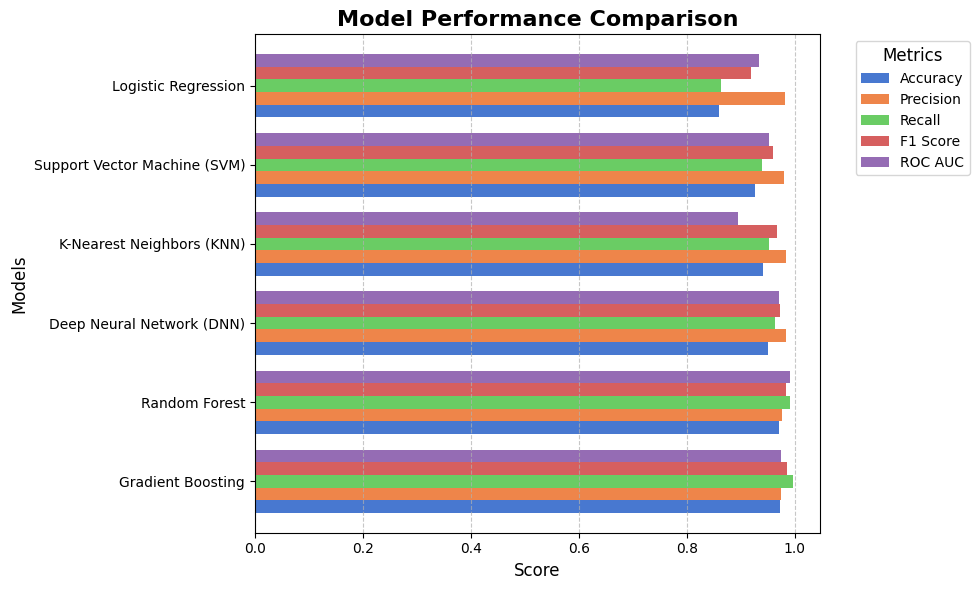

In [ ]:
# Set a color palette for the bars
sns.set_palette("muted")  # This gives a good set of distinguishable colors

# Plotting the results as a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sorted_results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]].plot(
    kind='barh', stacked=False, figsize=(10, 6), width=0.8
)

# Adding labels and title
plt.title('Model Performance Comparison', fontsize=16, weight='bold')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Customize the legend
plt.legend(title='Metrics', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines to the background
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#Gradient Boosting has the best overall performance and is thus selected

Hyper parameter tuning

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting each base learner
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
best_accuracy = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {best_accuracy}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1}
Best Model Accuracy: 0.9753086419753086


In [ ]:
# Predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# Calculate metrics
best_precision = precision_score(y_test, y_pred)
best_recall = recall_score(y_test, y_pred)
best_f1 = f1_score(y_test, y_pred)
best_roc_auc = roc_auc_score(y_test, y_prob)

# Display the results
print(f"Best Model Accuracy: {best_accuracy}")
print(f"Best Model Precision: {best_precision}")
print(f"Best Model Recall: {best_recall}")
print(f"Best Model F1 Score: {best_f1}")
print(f"Best Model ROC AUC: {best_roc_auc}")


Best Model Accuracy: 0.9753086419753086
Best Model Precision: 0.9739583333333334
Best Model Recall: 1.0
Best Model F1 Score: 0.9868073878627969
Best Model ROC AUC: 0.9856822494393652


Cross Validation

In [ ]:
# Define the model with the best hyperparameters
best_model = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=7,
    learning_rate=0.1,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")


Cross-validation Accuracy Scores: [1.         0.98876404 0.98033708 0.9971831  0.9943662 ]
Mean Accuracy: 0.9921
Standard Deviation of Accuracy: 0.0070


In [ ]:
# Good performance in cross validation suggests that the model is not only accurate but also stable, meaning it performs well on various subsets of the data.
# This is a good indication of generalizability.
